## Ujian Tengah Semester - Natural Language Programming

- Nama: Irfan Saputra Nasution
- NIM : 210401107
- Dosen Pengampu : Taslim, M.Kom, MTA, MCF


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## **Tahap 1: Data Preprocessing**

### **1. Eksplorasi Data**

#### 1.1 Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from gensim.models import Word2Vec
from google.colab import drive
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import words
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Download NLTK stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
nltk.download('words')
word_list = set(words.words())

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


#### 1.2 Import Data

In [ ]:
# Mount Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Phishing_Email.csv')

#### 1.3 Memahami Struktur Dataset

In [ ]:
df.head(20) # Menampilkan 20 dataset pertama

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email
5,5,global risk management operations sally congra...,Safe Email
6,6,"On Sun, Aug 11, 2002 at 11:17:47AM +0100, wint...",Safe Email
7,7,"entourage , stockmogul newsletter ralph velez ...",Phishing Email
8,8,"we owe you lots of money dear applicant , afte...",Phishing Email
9,9,re : coastal deal - with exxon participation u...,Safe Email


In [ ]:
# Tampilkan informasi umum tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18650 non-null  int64 
 1   Email Text  18634 non-null  object
 2   Email Type  18650 non-null  object
dtypes: int64(1), object(2)
memory usage: 437.2+ KB


In [ ]:
# Mengubah Tipe Data
df['Email Text'] = df['Email Text'].astype("string")
df['Email Type'] = df['Email Type'].astype("string")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18650 non-null  int64 
 1   Email Text  18634 non-null  string
 2   Email Type  18650 non-null  string
dtypes: int64(1), string(2)
memory usage: 437.2 KB


#### 1.4 Menangani Missing Value, Data Null, Duplicated

In [ ]:
# Pengecekan Duplicated
df.duplicated().sum()

0

In [ ]:
# Pengecekan Data Null (Kosong)
df.isnull().sum()

,0
Unnamed: 0,0
Email Text,16
Email Type,0


In [ ]:
# Hapus Null
df = df.dropna()
df.isnull().sum()

,0
Unnamed: 0,0
Email Text,0
Email Type,0


#### 1.5 Analisis Distribusi Data

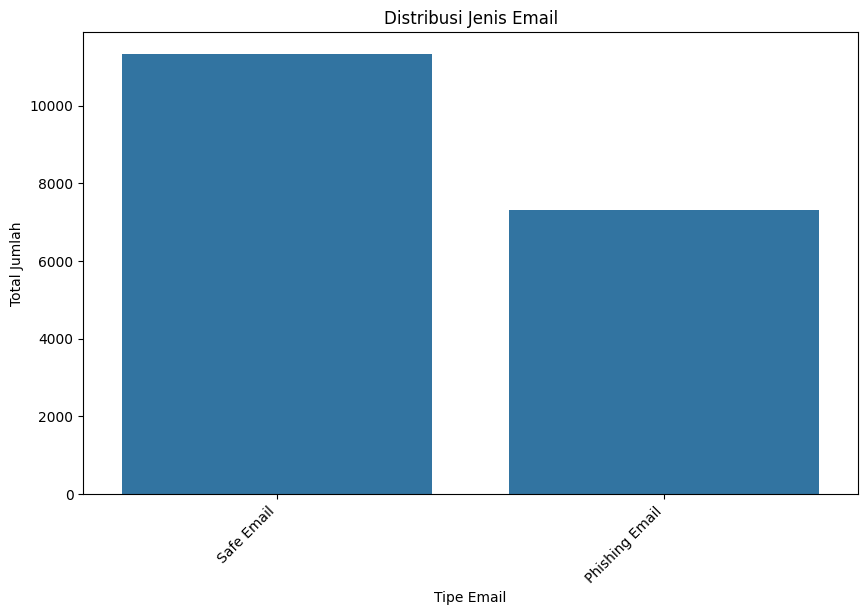

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Email Type', data=df)
plt.title('Distribusi Jenis Email')
plt.xlabel('Tipe Email')
plt.ylabel('Total Jumlah')
plt.xticks(rotation=45, ha='right')
plt.show()

### **2. Proses Pembersihan**

#### 2.1 Pembersihan Teks

In [ ]:
# Perubahan teks menjadi kecil
def lowercase(review_text):
    low = review_text.lower()
    return low

df['clean_content'] = df['Email Text'].apply(lambda low:lowercase(str(low)))

In [ ]:
# Menghapus URL
def clean_url(review_text):
  return re.sub(r'http\S+', '', review_text)
df['clean_content'] = df['clean_content'].apply(lambda url:clean_url(str(url)))

In [ ]:
# Menghapus Angka dan Tanda Baca
def clean_non_alphanumeric(review_text):
  return re.sub('[^a-zA-Z]', ' ', review_text)
df['clean_content'] = df['clean_content'].apply(clean_non_alphanumeric)

In [ ]:
# Menghapus mention
def mention_remove(review_text):
  return re.sub(r"@\w+", "", review_text)
df['clean_content'] = df['clean_content'].apply(mention_remove)

In [ ]:
# Menghapus Hastags
def hashtag_remove(review_text):
  return re.sub(r"#\w+", "", review_text)
df['clean_content'] = df['clean_content'].apply(hashtag_remove)

In [ ]:
# Remove word repetition
def word_repetition(review_text):
  review = re.sub(r'(.)\1+', r'\1\1', review_text)
  return review

df['clean_content'] = df['clean_content'].apply(lambda word: word_repetition(word))

In [ ]:
# Menghapus WhiteSpace Huruf
def remove_whitespace_LT(review_text):
  return review_text.strip()
df['clean_content'] = df['clean_content'].apply(remove_whitespace_LT)

#### 2.2 Stopword Removal

In [ ]:
# Check List Stopword Removal
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# Melakukan Stopword Removal
stop_words = set(stopwords.words('english'))
def clean_stopwords(review_teks):
  review = ' '.join([word for word in review_teks.split() if word not in stop_words])
  return review
df['clean_content'] = df['clean_content'].apply(clean_stopwords)

#### 2.3 Lemmatization

In [ ]:
# Mengunduh NLTK Lemmatization
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Melakukan Lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatization(review_text):
  review = ' '.join([lemmatizer.lemmatize(word) for word in review_text.split()])
  return review
df['clean_content'] = df['clean_content'].apply(lemmatization)

#### 2.4 Stemming

In [ ]:
from nltk.stem import PorterStemmer

# Melakukan Stemming
stemmer = PorterStemmer()
def stemming(review_text):
    review = ' '.join([stemmer.stem(word) for word in review_text.split()])
    return review

df['clean_content'] = df['clean_content'].apply(stemming)

#### 2.5 Hasil Pembersihan Teks

In [ ]:
# Hasil Pembersihan (Menampilkan 20 Data)
df.head(20)

,Unnamed: 0,Email Text,Email Type,clean_content
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email,disc uniformitarian sex lang dick hudson obser...
1,1,the other side of * galicismos * * galicismo *...,Safe Email,side galicismo galicismo spanish term name imp...
2,2,re : equistar deal tickets are you still avail...,Safe Email,equistar deal ticket still avail assist robert...
3,3,Hello I am your hot lil horny toy. I am t...,Phishing Email,hello hot lil horni toy one dream open mind pe...
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email,softwar incred low price lower draperi sevente...
5,5,global risk management operations sally congra...,Safe Email,global risk manag oper salli congratul new rol...
6,6,"On Sun, Aug 11, 2002 at 11:17:47AM +0100, wint...",Safe Email,sun aug wintermut mention impress get read lkm...
7,7,"entourage , stockmogul newsletter ralph velez ...",Phishing Email,entourag stockmogul newslett ralph velez genex...
8,8,"we owe you lots of money dear applicant , afte...",Phishing Email,owe lot money dear applic review upon receiv a...
9,9,re : coastal deal - with exxon participation u...,Safe Email,coastal deal exxon particip project agreement ...


## **Tahap 2: Representasi Teks**

In [ ]:
# Tokenisasi Teks
df['tokens'] = df['clean_content'].apply(lambda x: x.split())
print('Hasil Tokenizing : \n')
df.head()

Hasil Tokenizing : 



,Unnamed: 0,Email Text,Email Type,clean_content,tokens
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email,disc uniformitarian sex lang dick hudson obser...,"[disc, uniformitarian, sex, lang, dick, hudson..."
1,1,the other side of * galicismos * * galicismo *...,Safe Email,side galicismo galicismo spanish term name imp...,"[side, galicismo, galicismo, spanish, term, na..."
2,2,re : equistar deal tickets are you still avail...,Safe Email,equistar deal ticket still avail assist robert...,"[equistar, deal, ticket, still, avail, assist,..."
3,3,Hello I am your hot lil horny toy. I am t...,Phishing Email,hello hot lil horni toy one dream open mind pe...,"[hello, hot, lil, horni, toy, one, dream, open..."
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email,softwar incred low price lower draperi sevente...,"[softwar, incred, low, price, lower, draperi, ..."


In [ ]:
# Fungsi untuk menggabungkan list token menjadi string
def join_text_list(tokens):
    # Pastikan tokens adalah list
    if isinstance(tokens, list):
        return ' '.join(tokens)
    return ''

# Mengaplikasikan fungsi ke kolom 'tokens'
df["list"] = df["tokens"].apply(join_text_list)
df.head()

,Unnamed: 0,Email Text,Email Type,clean_content,tokens,list
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email,disc uniformitarian sex lang dick hudson obser...,"[disc, uniformitarian, sex, lang, dick, hudson...",disc uniformitarian sex lang dick hudson obser...
1,1,the other side of * galicismos * * galicismo *...,Safe Email,side galicismo galicismo spanish term name imp...,"[side, galicismo, galicismo, spanish, term, na...",side galicismo galicismo spanish term name imp...
2,2,re : equistar deal tickets are you still avail...,Safe Email,equistar deal ticket still avail assist robert...,"[equistar, deal, ticket, still, avail, assist,...",equistar deal ticket still avail assist robert...
3,3,Hello I am your hot lil horny toy. I am t...,Phishing Email,hello hot lil horni toy one dream open mind pe...,"[hello, hot, lil, horni, toy, one, dream, open...",hello hot lil horni toy one dream open mind pe...
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email,softwar incred low price lower draperi sevente...,"[softwar, incred, low, price, lower, draperi, ...",softwar incred low price lower draperi sevente...


### **3. Text Vectorization**

#### 3.1 TF-IDF

In [ ]:
# Ekstraksi Fitur dengan TF-IDF
vectorizer=TfidfVectorizer(strip_accents='unicode',
                           analyzer='word', ngram_range=(1, 2),
                           max_features=5000, smooth_idf=True,
                           sublinear_tf=True)

# Fit vectorizer untuk mempelajari kosakata dari teks di kolom 'list'
vectorizer.fit(df["list"])

# Transformasi teks menjadi representasi numerik (TF-IDF)
X = vectorizer.transform(df["list"]).toarray()

In [ ]:
terms = vectorizer.get_feature_names_out()

# Menjumlahkan frekuensi tf-idf setiap istilah melalui dokumen
sums = X.sum(axis=0)

# Menghubungkan istilah dengan frekuensi jumlahnya
data = []
for col, term in enumerate(terms):
    data.append((term, sums[col]))

# Membuat DataFrame untuk menampilkan istilah dan peringkatnya
ranking = pd.DataFrame(data, columns=['term','rank'])

# Mengurutkan berdasarkan peringkat (rank) secara menurun
ranking.sort_values('rank', ascending=False)

,term,rank
1360,empti,540.923301
789,com,364.008284
3325,pleas,361.783564
1808,get,338.023094
2514,list,335.270544
...,...,...
1374,enenkio,0.331570
4602,tvsr,0.307705
2343,kingdom enenkio,0.299425
1590,fax subject,0.029744


In [ ]:
def calc_TF(document):
    # Counts the number of times the word appears in review
    TF_dict = {}
    for term in document:
        if term in TF_dict:
            TF_dict[term] += 1
        else:
            TF_dict[term] = 1
    # Computes tf for each word
    for term in TF_dict:
        TF_dict[term] = TF_dict[term] / len(document)
    return TF_dict

df["TF_dict"] = df['tokens'].apply(calc_TF)
df["TF_dict"].head()

,TF_dict
0,"{'disc': 0.012048192771084338, 'uniformitarian..."
1,"{'side': 0.024390243902439025, 'galicismo': 0...."
2,"{'equistar': 0.034782608695652174, 'deal': 0.0..."
3,"{'hello': 0.02127659574468085, 'hot': 0.021276..."
4,"{'softwar': 0.017543859649122806, 'incred': 0...."


In [ ]:
# Check TF result
index = 1

print('%20s' % "term", "\t", "TF\n")
for key in df["TF_dict"][index]:
    print('%20s' % key, "\t", df["TF_dict"][index][key])

                term 	 TF

                side 	 0.024390243902439025
           galicismo 	 0.07317073170731707
             spanish 	 0.07317073170731707
                term 	 0.04878048780487805
                name 	 0.024390243902439025
              improp 	 0.024390243902439025
           introduct 	 0.024390243902439025
              french 	 0.04878048780487805
                word 	 0.04878048780487805
               sound 	 0.024390243902439025
                 thu 	 0.024390243902439025
              decept 	 0.024390243902439025
                 ear 	 0.024390243902439025
               often 	 0.024390243902439025
              consid 	 0.024390243902439025
          barbarismo 	 0.024390243902439025
               would 	 0.024390243902439025
              design 	 0.024390243902439025
             opposit 	 0.024390243902439025
          phenomenon 	 0.024390243902439025
               unlaw 	 0.024390243902439025
              origin 	 0.024390243902439025
          

In [ ]:
def calc_DF(tfDict):
    count_DF = {}
    # Run through each document's tf dictionary and increment countDict's (term, doc) pair
    for document in tfDict:
        for term in document:
            if term in count_DF:
                count_DF[term] += 1
            else:
                count_DF[term] = 1
    return count_DF

DF = calc_DF(df["TF_dict"])

In [ ]:
# Misal n_document adalah jumlah total dokumen
n_document = len(df['tokens'])

# Fungsi untuk menghitung IDF
def calc_IDF(n_document, DF):
    IDF_Dict = {}
    for term in DF:
        # Rumus IDF: log(N / (DF(t) + 1))
        IDF_Dict[term] = np.log(n_document / (DF[term] + 1))
    return IDF_Dict

# Menghitung IDF berdasarkan Document Frequency (DF)
IDF = calc_IDF(n_document, DF)

# Menampilkan IDF yang dihitung
print(IDF)

{'disc': 5.413902540213773, 'uniformitarian': 8.040983678782315, 'sex': 3.889943772883669, 'lang': 4.988556061551779, 'dick': 5.289448365740366, 'hudson': 6.24922420955426, 'observ': 4.443671418193869, 'u': 1.4388481729386264, 'use': 1.3572056318629653, 'aughter': 8.44644878689048, 'voc': 7.530158055016325, 'thought': 3.101725047528287, 'provok': 6.465447318023896, 'sure': 2.6234028914074607, 'fair': 4.476156873338358, 'attribut': 4.891100725401066, 'son': 4.5752477759825885, 'treat': 4.018612616185304, 'like': 1.4887135756033218, 'senior': 4.080170509184737, 'rel': 3.75280995291478, 'one': 1.3167506771706516, 'thing': 2.440095627288747, 'n': 2.497761269138556, 'normal': 3.4749008815022706, 'brother': 4.849136526302034, 'way': 2.03176107675263, 'hard': 3.0237038419673907, 'imagin': 3.95221016160967, 'natur': 2.7913314842155597, 'class': 3.598332422291999, 'compris': 5.289448365740366, 'exclud': 4.7028444330872965, 'anoth': 2.7196010393032823, 'seem': 2.8188276731998427, 'differ': 2.356

In [ ]:
#calc TF-IDF
def calc_TF_IDF(TF):
    TF_IDF_Dict = {}
    #For each word in the review, we multiply its tf and its idf.
    for key in TF:
        TF_IDF_Dict[key] = TF[key] * IDF[key]
    return TF_IDF_Dict

#Stores the TF-IDF Series
df["TF-IDF_dict"] = df["TF_dict"].apply(calc_TF_IDF)

In [ ]:
# Check TF-IDF result
index = 1

print('%20s' % "term", "\t", '%10s' % "TF", "\t", '%20s' % "TF-IDF\n")
for key in df["TF-IDF_dict"][index]:
    print('%20s' % key, "\t", df["TF_dict"][index][key] ,"\t" , df["TF-IDF_dict"][index][key])

                term 	         TF 	              TF-IDF

                side 	 0.024390243902439025 	 0.08701077890908927
           galicismo 	 0.07317073170731707 	 0.6390827458055311
             spanish 	 0.07317073170731707 	 0.325817984961213
                term 	 0.04878048780487805 	 0.13113833988727958
                name 	 0.024390243902439025 	 0.04948536206028287
              improp 	 0.024390243902439025 	 0.16800741875229097
           introduct 	 0.024390243902439025 	 0.1032761265612682
              french 	 0.04878048780487805 	 0.1893707607523241
                word 	 0.04878048780487805 	 0.12235381310545553
               sound 	 0.024390243902439025 	 0.08404545923531037
                 thu 	 0.024390243902439025 	 0.0827267465214012
              decept 	 0.024390243902439025 	 0.172198888433429
                 ear 	 0.024390243902439025 	 0.1320464034198481
               often 	 0.024390243902439025 	 0.08949825229209096
              consid 	 0.02439024

## **Tahap 3: Pemodelan Klasifikasi**

In [ ]:
# Melihat dimensi dari X
X.shape

(18634, 5000)

In [ ]:
# Melakukan Label Encoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Email Type'])

In [ ]:
# Pembagian Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
def summarize_data_split(X_train, X_test, y_train, y_test):
  print("Training:", X_train.shape)
  print("Testing:", y_test.shape)

summarize_data_split(X_train, X_test, y_train, y_test)

Training: (13043, 5000)
Testing: (5591,)


### **4. Model Klasifikasi**

#### 4.1 Pembuatan Model KNN dengan TF-IDF

In [ ]:
def train_knn_models(X_train, y_train, k_values):
    knn_models = []
    for k in k_values:
        # Melatih KNN dengan nilai k tertentu
        knn_classifier = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='minkowski')
        knn_classifier.fit(X_train, y_train)
        knn_models.append((f'KNN (k={k})', knn_classifier))  # Menyimpan model dan nilai k-nya
    return knn_models

# Melatih model KNN untuk berbagai nilai k
k_values = [3, 5]
knn_models = train_knn_models(X_train, y_train, k_values)

#### 4.2 Evaluasi Model KNN dengan TF-IDF

In [ ]:
# Fungsi untuk mengevaluasi model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    # Pastikan label yang ada di y_test yang digunakan dalam confusion_matrix
    labels = np.unique(y_test)

    cm = confusion_matrix(y_test, y_pred, labels=labels)
    tn, fp, fn, tp = cm.ravel()

    return {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, pos_label=labels[1]),
        'Recall': recall_score(y_test, y_pred, pos_label=labels[1]),
        'F1-Score': f1_score(y_test, y_pred, pos_label=labels[1])
    }

# Fungsi untuk mengevaluasi model KNN yang sudah dilatih
def evaluate_knn_models(knn_models, X_test, y_test):
    knn_results = []
    for model_name, model in knn_models:
        metrics = evaluate_model(model, X_test, y_test)
        knn_results.append({
            'Model': model_name,
            'Accuracy': metrics['Accuracy'],
            'Precision': metrics['Precision'],
            'Recall': metrics['Recall'],
            'F1-Score': metrics['F1-Score']
        })
    return knn_results

# Mengevaluasi model yang sudah dilatih
knn_results = evaluate_knn_models(knn_models, X_test, y_test)

# Buat DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(knn_results)

# Tampilkan hasil
print(summary_df)

       Model  Accuracy  Precision    Recall  F1-Score
0  KNN (k=3)  0.603470   0.999120  0.338705  0.505906
1  KNN (k=5)  0.583438   0.998051  0.305580  0.467900


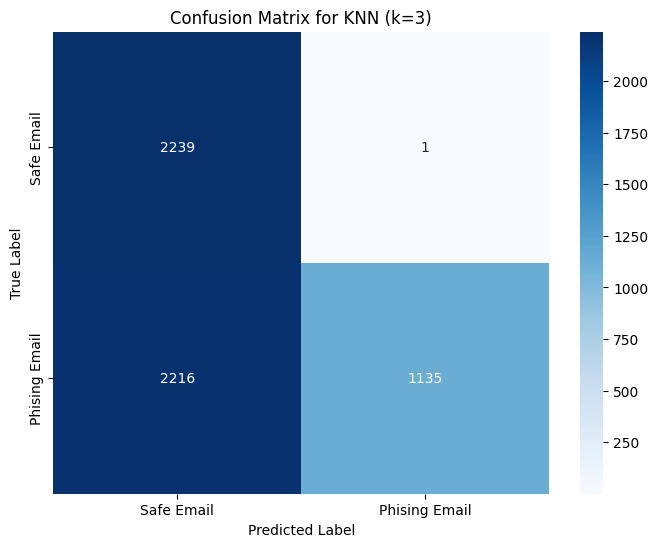

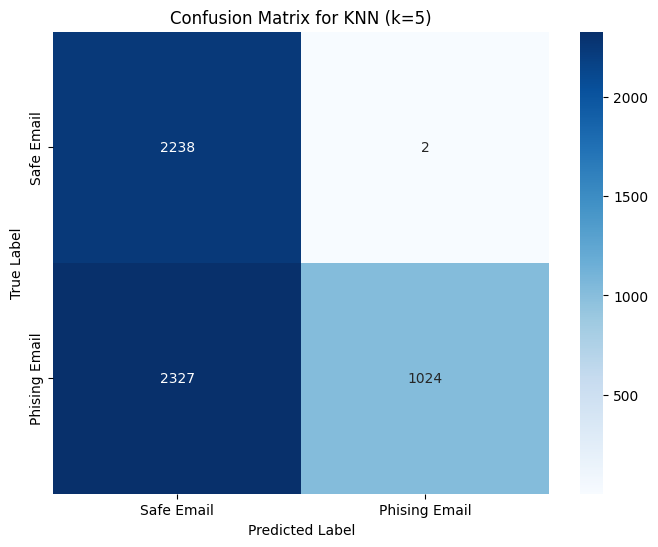

In [ ]:
def plot_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Safe Email', 'Phising Email'],
                yticklabels=['Safe Email', 'Phising Email'])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()


for model_name, model in knn_models:
    plot_confusion_matrix(model, X_test, y_test)

#### 4.3 Pembuatan Model Naive Bayes dengan TF-IDF

In [ ]:
# Evaluasi Naive Bayes
nb_results = []

# Inisialisasi Naive Bayes (GaussianNB)
nb_classifier = GaussianNB(var_smoothing=1e-9)

# Convert X_train and X_test to dense arrays
X_train_dense = X_train  # Assuming X_train is a sparse matrix
X_test_dense = X_test   # Assuming X_test is a sparse matrix

# Melatih model Naive Bayes
nb_classifier.fit(X_train_dense, y_train)

# Menghitung metrik evaluasi
metrics = evaluate_model(nb_classifier, X_test_dense, y_test)

In [ ]:
# Fungsi untuk mengevaluasi model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    # Pastikan label yang ada di y_test yang digunakan dalam confusion_matrix
    labels = np.unique(y_test)  # Menyesuaikan label dengan yang ada di y_test

    cm = confusion_matrix(y_test, y_pred, labels=labels)
    tn, fp, fn, tp = cm.ravel()

    return {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, pos_label=labels[1]),
        'Recall': recall_score(y_test, y_pred, pos_label=labels[1]),
        'F1-Score': f1_score(y_test, y_pred, pos_label=labels[1])
    }

# Menyimpan hasil evaluasi
nb_results.append({
    'Model': 'Naive Bayes',
    'Accuracy': metrics['Accuracy'],
    'Precision': metrics['Precision'],
    'Recall': metrics['Recall'],
    'F1-Score': metrics['F1-Score']
})

# Buat DataFrame untuk meringkas hasil Naive Bayes
nb_summary_df = pd.DataFrame(nb_results)

# Tampilkan hasil
print(nb_summary_df)

         Model  Accuracy  Precision    Recall  F1-Score
0  Naive Bayes  0.905741   0.965086  0.874366  0.917489


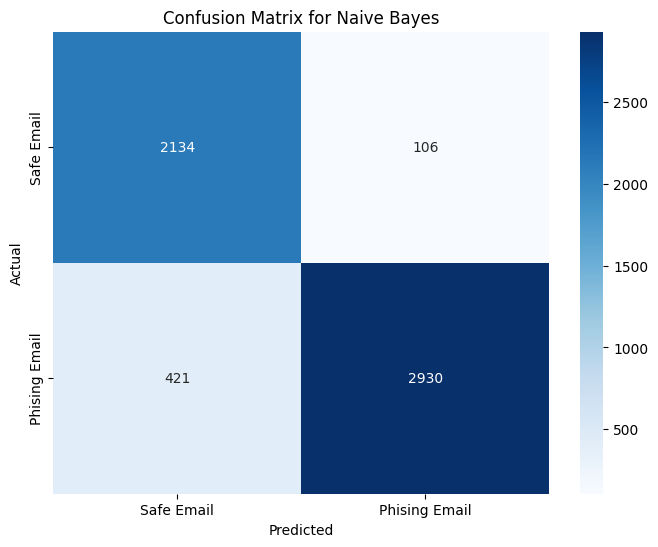

In [ ]:
y_pred_nb = nb_classifier.predict(X_test_dense)

# Calculate the confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", # Changed cm to cm_nb
                xticklabels=['Safe Email', 'Phising Email'],
                yticklabels=['Safe Email', 'Phising Email'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()